In [1]:
# convert raw HLS reflectance data to a true color image
# using bands 4 (red), 3 (green), 2 (blue)


#import required libraries
import rasterio as rio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import rioxarray as rxr
%matplotlib inline

In [10]:
#import bands as separate 1 band raster
imagePath = '/Users/jacktarricone/Desktop/tweet/'

# open rasters using xarray
b4 = rio.open(imagePath+'HLS.S30.T10SGJ.2021244T184919.v2.0.B04.tif') # red
b3 = rio.open(imagePath+'HLS.S30.T10SGJ.2021244T184919.v2.0.B03.tif') # green
b2 = rio.open(imagePath+'HLS.S30.T10SGJ.2021244T184919.v2.0.B02.tif') # blue

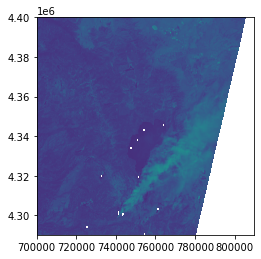

<AxesSubplot:>

In [11]:
#plot band 
plot.show(b4)

In [12]:
# raster sytem of reference
b4.crs

CRS.from_wkt('PROJCS["UTM Zone 10, Northern Hemisphere",GEOGCS["Unknown datum based upon the WGS 84 ellipsoid",DATUM["Not_specified_based_on_WGS_84_spheroid",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

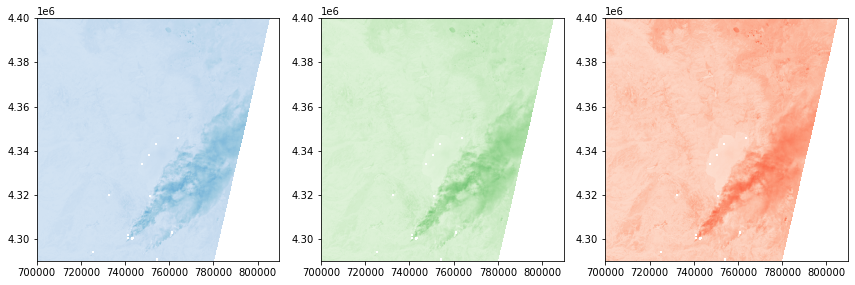

In [13]:
# plot all three bands
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(b2, ax = ax1, cmap = 'Blues')
plot.show(b3, ax = ax2, cmap = 'Greens')
plot.show(b4, ax = ax3, cmap = 'Reds')
fig.tight_layout()

In [14]:
#export true color image
trueColor = rio.open(imagePath+'true_color_smoke.tiff','w',driver='Gtiff',
                         width=b4.width, height=b4.height,
                         count=3,
                         crs=b4.crs,
                         transform=b4.transform,
                         dtype=b4.dtypes[0]
                         )
trueColor.write(b2.read(1),3) #blue
trueColor.write(b3.read(1),2) #green
trueColor.write(b4.read(1),1) #red
trueColor.close()


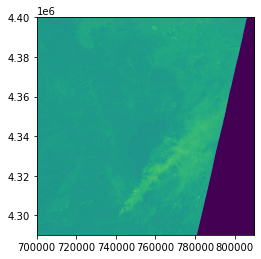

<AxesSubplot:>

In [15]:
src = rio.open(imagePath+'true_color_smoke.tiff', count=3)
plot.show(src)